## 1.1

In [ ]:
import numpy as np

# Sampling rate
fs = 1600  # Hz
T = 1 / fs  # Sampling period in seconds
duration = 2  # seconds

# Generate the time array
t = np.arange(0, duration, T)

# Confirm the size
print(f"Number of samples: {len(t)}")


Number of samples: 3200


### Maximum Frequency

According to the Nyquist–Shannon Sampling Theorem:

$$
f_{\text{max}} = \frac{f_s}{2} = \frac{1600}{2} = 800 \, \text{Hz}
$$

## 1.2

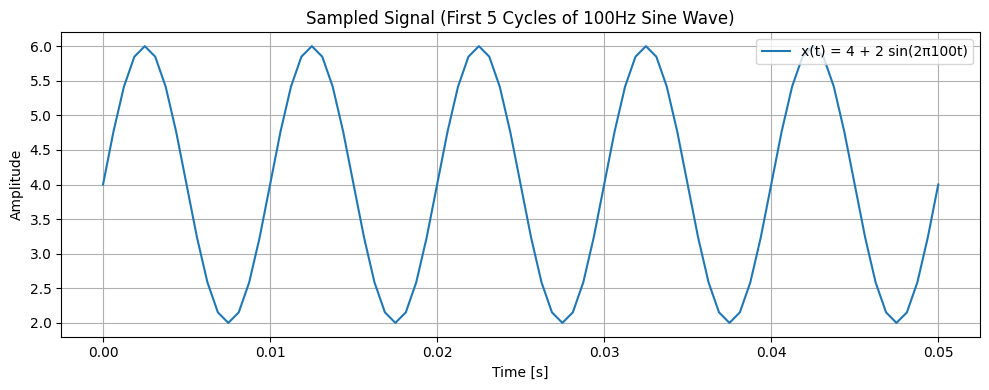

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 1600  # Hz
T = 1 / fs
duration = 2
t = np.arange(0, duration, T)

# Sampled signal
x = 4 + 2 * np.sin(2 * np.pi * 100 * t)

# Limit to 0.05 seconds (5 sine wave cycles)
max_time = 0.05
t_limited = t[t <= max_time]
x_limited = x[:len(t_limited)]

# Plot
plt.figure(figsize=(10, 4))
plt.plot(t_limited, x_limited, label='x(t) = 4 + 2 sin(2π100t)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Sampled Signal (First 5 Cycles of 100Hz Sine Wave)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



## 2.1

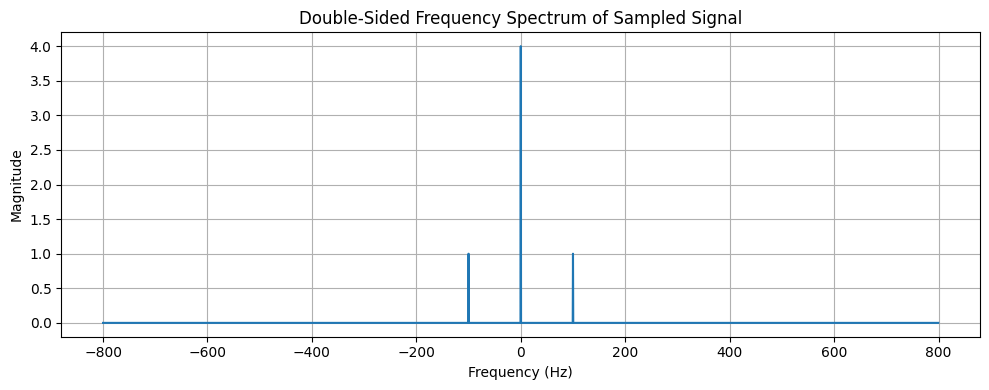

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling setup (same as before)
fs = 1600  # Hz
T = 1 / fs
duration = 2
t = np.arange(0, duration, T)

# Sampled signal
x = 4 + 2 * np.sin(2 * np.pi * 100 * t)

# Compute FFT
X = np.fft.fft(x)
N = len(X)
freqs = np.fft.fftfreq(N, T)

# Shift for double-sided spectrum
X_shifted = np.fft.fftshift(X)
freqs_shifted = np.fft.fftshift(freqs)

# Plot magnitude spectrum
plt.figure(figsize=(10, 4))
plt.plot(freqs_shifted, np.abs(X_shifted) / N)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Double-Sided Frequency Spectrum of Sampled Signal')
plt.grid(True)
plt.tight_layout()
plt.show()


## 2.2

based off the 
$$
x(t) = 2 \cdot \sin(2\pi \cdot 100t) + 5 \cdot \cos(2\pi \cdot 1200t)
$$
 this is what i sketched:

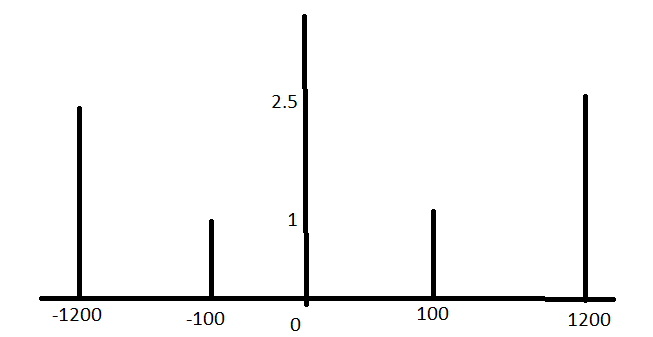

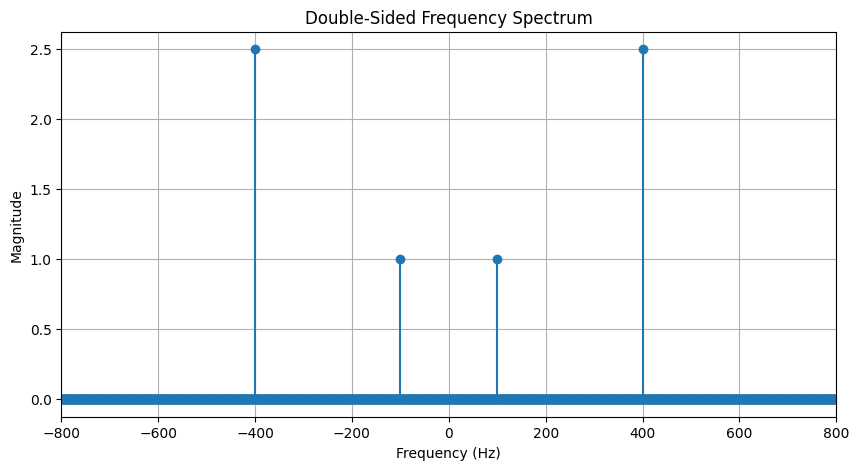

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 1600              # Sampling frequency
T = 1                  # Duration (1 second)
t = np.linspace(0, T, int(fs*T), endpoint=False)

# Signal
x = 2 * np.sin(2 * np.pi * 100 * t) + 5 * np.cos(2 * np.pi * 1200 * t)

# FFT
X = np.fft.fft(x)
freqs = np.fft.fftfreq(len(x), d=1/fs)

# Shift and normalize
X_mag = np.abs(np.fft.fftshift(X)) / len(x)
freqs_shifted = np.fft.fftshift(freqs)

# Plot
plt.figure(figsize=(10, 5))
plt.stem(freqs_shifted, X_mag, basefmt=" ")
plt.title("Double-Sided Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.xlim(-800, 800)  # Nyquist range
plt.show()


This is defferent then what i had sketched. The magnitude of 1 at 100hz and -100hz is the same as what i got in the code, as the frequency used was under the maximum of 800 (1600/2).

however, the frequencies at 1200hz and -1200hz in my sektch are wrong, as it was above the maximum of 800hz, so it was aliased to 400hz (1600-1200), and therefore was represented as 400hz.

## 2.3


To properly visualize a square wave, we would need a sampeling frequency of 2000hz. 
this gives us an upper limit of 1000hz, which gives at least 19 harmonics for the square wave, which come up to 950hz.


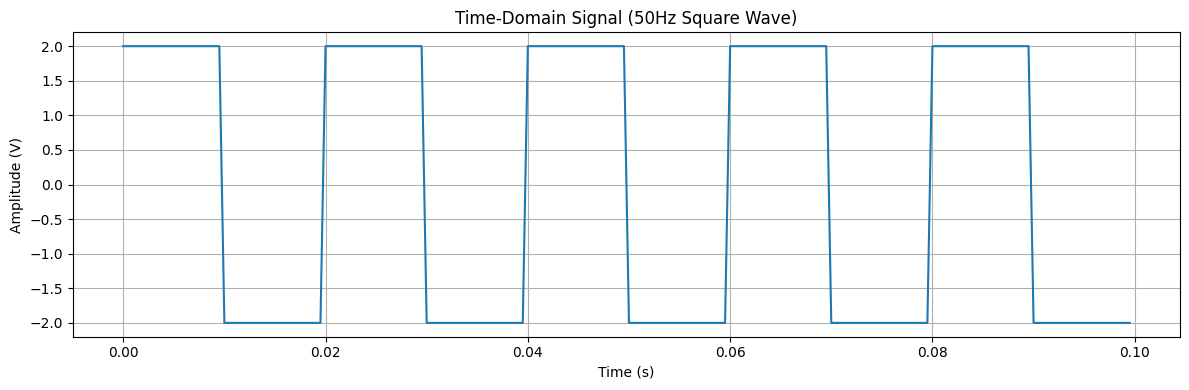

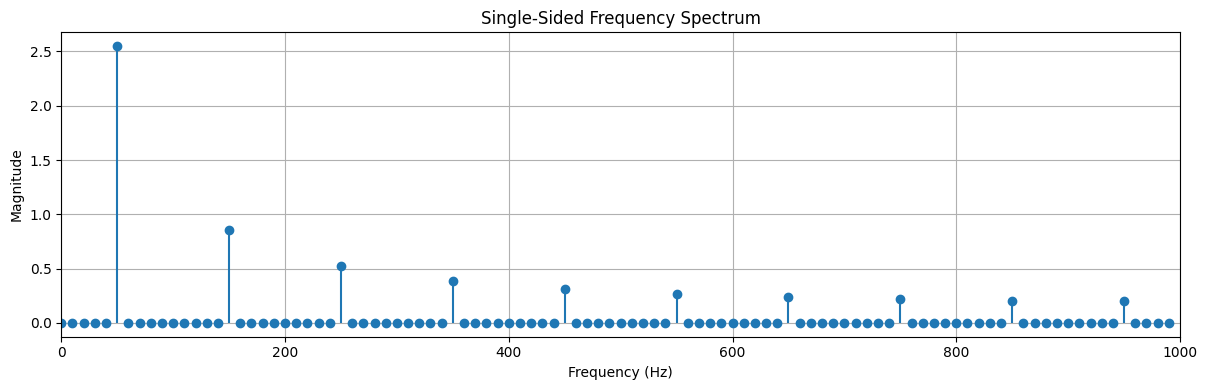

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parameters
fs = 2000           # Sampling frequency (Hz)
T = 0.1             # Duration in seconds
t = np.linspace(0, T, int(fs*T), endpoint=False)

# Square wave: 50 Hz, amplitude ±2V
square_wave = 2 * signal.square(2 * np.pi * 50 * t)

# FFT
N = len(square_wave)
X = np.fft.fft(square_wave)
X_mag = np.abs(X) / N  # Normalize
freqs = np.fft.fftfreq(N, 1/fs)

# Only take the single-sided spectrum
half_N = N // 2
freqs_half = freqs[:half_N]
X_mag_half = 2 * X_mag[:half_N]  # Multiply by 2 to account for single-sided

# Plot Time Domain
plt.figure(figsize=(12, 4))
plt.plot(t, square_wave)
plt.title("Time-Domain Signal (50Hz Square Wave)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (V)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Frequency Spectrum (Single-Sided)
plt.figure(figsize=(12, 4))
plt.stem(freqs_half, X_mag_half, basefmt=" ")
plt.title("Single-Sided Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.tight_layout()
plt.xlim(0, 1000)  # Nyquist limit
plt.show()
